In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Project overview


Steps

1. I want to get a feel for the data:
    - What is the type of the data
    - What kind of features do I have
    - What is the distribution of the data like
    - Correlation betweens features
    
2. Data exploration
    - What are some intuitive ideas about what it would take to survive on the Titanic?
        - Wealthy vs non-wealthy
        - male vs female
        - children vs adults
        - traveling alone vs in groups
        - location on the ship
    - What are the value counts like for features based on the survived vs deceased?
    
    
    
    
 
3. What kind of data manipulation has to be done to create models for this data set?
     - Deal with missing values
         - What data is to be dropped vs imputed
     - How should data be transformed?
         - get_dummies for categorical variables
     - How should data be scaled?
         - Should we do MinMaxScaler or StandardScaler?
         
         
         
         
4. Create all classification models you know
     - Logistic Regression
     - KNN
     - SVM
     - Decision Tree
     - Random Forests
     - Boosting Methods
     - Naive Bayes
     
5. GridSearch best params and find your best model
     - Can show performance emtrics like classification report and plot the confusion matrix
     
     
     
     
6. Conclude the project and make a submission to kaggle**

In [3]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')


# Step 1:

* I want to get a feel for the data:
    * What is the type of the data
    * What kind of features do I have
    * What is the distribution of the data like
    * Correlation betweens features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
num = df[['Age','SibSp','Parch','Fare']]

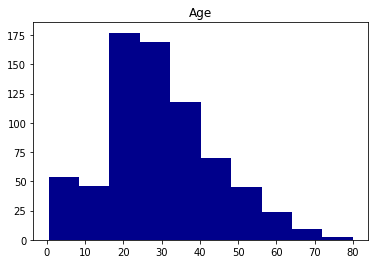

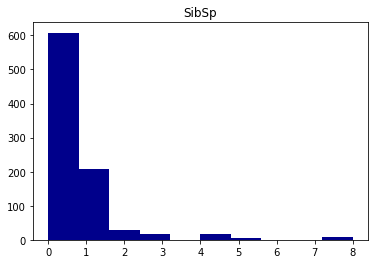

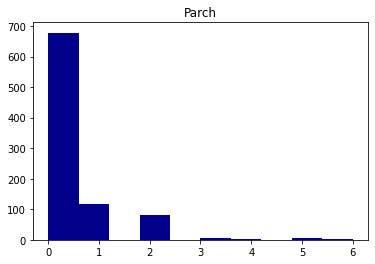

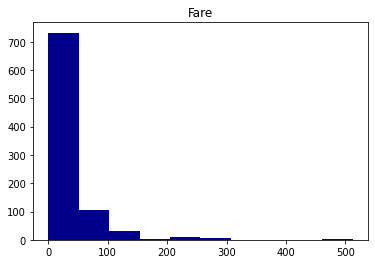

In [9]:
for feature in num.columns:
    plt.hist(num[feature],color = 'darkblue')
    plt.title(feature)
    plt.show()

<AxesSubplot:>

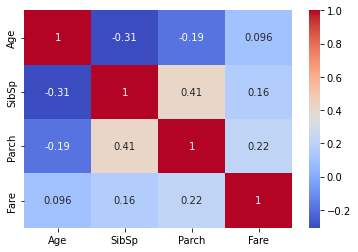

In [10]:
sns.heatmap(num.corr(),annot=True,cmap = 'coolwarm')

2. Data exploration
    - What are some intuitive ideas about what it would take to survive on the Titanic?
        - Wealthy vs non-wealthy
        - male vs female
        - children vs adults
        - traveling alone vs in groups
        - location on the ship
    - What are the value counts like for features based on the survived vs deceased?

In [11]:
pd.pivot_table(df,index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [12]:
# Summary of numeric features

# Should create a feature named isChild where it shows survival of people under 14 as younger people had a better chance
# Fare doesn't have a normal distribution but that is kinda expected (first class will never have as many seats as 2nd/3rd)

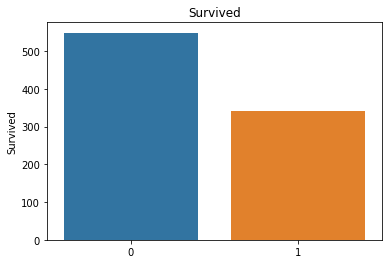

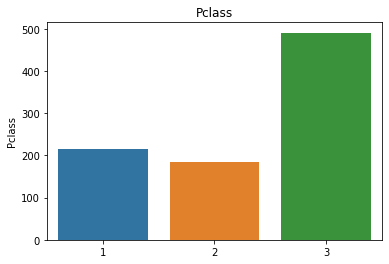

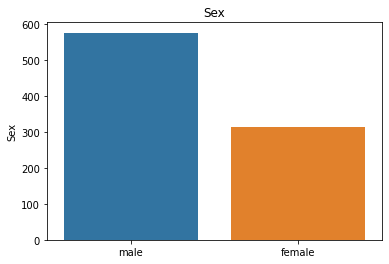

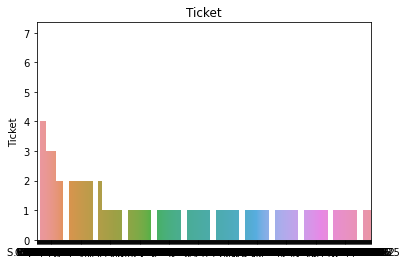

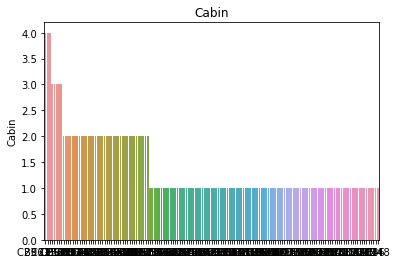

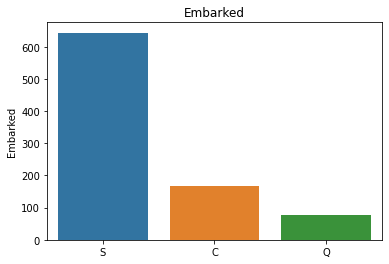

In [13]:
for feature in cat.columns:
    sns.barplot(x = cat[feature].value_counts().index , y = cat[feature].value_counts()).set_title(feature)
    plt.show()

In [14]:
# Summary of categorical features

# Majority came from S so data may be skewed there
# Need to fix Cabin by letter
# Distribution is abround 66-33 deceased vs survived so expect numbers to be around the same if there is nothing fishy with a feature
# Need to check out survival rates for these as it seems lots of features aren't equal

In [15]:
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [16]:
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))

Sex       female  male
Survived              
0             81   468
1            233   109


In [17]:
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [18]:
# Much more likely to survive if you are female
# Cherbourg had a positive survival ratio when overall titanic had negative survival ratio
# Much more likely to survive if from Pclass 1 than any other class

3. What kind of data manipulation has to be done to create models for this data set?
     - Deal with missing values
         - What data is to be dropped vs imputed
         
     - Feature engineering
         - Change cabin to be by letter 
         - Change ticket to be number or alpha numeric
         - Add a column that states isChild
                  
     - How should data be transformed?
         - get_dummies for categorical variables
         
     - How should data be scaled?
         - Should we do MinMaxScaler or StandardScaler?

In [19]:
# Missing Values

In [20]:
full_df = pd.concat([df,df_test])

In [21]:
full_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [22]:
# df.dropna(subset=['Embarked'],inplace = True)
# df_test.dropna(subset=['Embarked'],inplace = True)

full_df.Age = df.Age.fillna(full_df.Age.median())
full_df['Fare'].fillna(full_df.Fare.median(),inplace= True)

# Going to try to fill Embarked in with mode of Embarked instead

full_df['Embarked'].fillna(full_df['Embarked'].mode()[0], inplace = True)



In [23]:
full_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [24]:
full_df['cabin_multiple'] = full_df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
full_df['cabin_multiple'].value_counts()

0    1014
1     254
2      26
3      10
4       5
Name: cabin_multiple, dtype: int64

In [25]:
full_df['cabin_adv'] = full_df.Cabin.apply(lambda x: str(x)[0])
full_df['cabin_adv'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_adv, dtype: int64

In [26]:
full_df.drop(['PassengerId','Cabin', 'Ticket'], axis=1, inplace = True)

In [27]:
# Creating some variables that seem important

full_df['FamilySize'] = full_df['SibSp']+full_df['Parch']+1

full_df['Alone'] = 1
full_df['Alone'].loc[full_df['FamilySize'] > 1] = 0


full_df['Title'] = full_df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

# Dividing people into bins by fare and age
# full_df['FareBin'] = pd.qcut(full_df['Fare'], 4)
# full_df['AgeBin'] = pd.cut(full_df['Age'].astype(int), 5)

def conditions(row):
    if row.Age <= 15:
        return 1
    else:
        return 0
            

full_df['Child'] = full_df.apply(conditions, axis=1)


In [28]:
full_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,cabin_adv,FamilySize,Alone,Title,Child
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,n,2,0,Mr,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,C,2,0,Mrs,0
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,n,1,1,Miss,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,C,2,0,Mrs,0
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,n,1,1,Mr,0


In [29]:
full_df = pd.get_dummies(full_df.drop('Name',axis = 1))

In [30]:
df_train = full_df.iloc[:891]
df_test = full_df.iloc[891:]

In [31]:
X_train = df_train.drop('Survived',axis = 1)
y_train = df_train['Survived']
X_test= df_test.drop('Survived',axis = 1)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
base_lr = LogisticRegression(max_iter = 3000)
from sklearn.svm import SVR
base_svm = SVR()
from sklearn.neighbors import KNeighborsClassifier
base_knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
base_tree = DecisionTreeClassifier(random_state = 1)
from sklearn.ensemble import RandomForestClassifier
base_rf = RandomForestClassifier(random_state = 1)
from sklearn.naive_bayes import GaussianNB
base_gnb = GaussianNB()
from sklearn.ensemble import GradientBoostingClassifier
base_gbc = GradientBoostingClassifier()
from sklearn.ensemble import AdaBoostClassifier
base_abc = AdaBoostClassifier()



all_base_models = [base_lr,base_rf,base_svm,base_tree,base_knn,base_gnb,base_gbc,base_abc]

In [34]:
for model in all_base_models: 
    cv = cross_val_score(model,scaled_X_train,y_train,cv=10)
    print(model)
    print(cv)
    print(cv.mean())
    print()

LogisticRegression(max_iter=3000)
[0.78888889 0.83146067 0.7752809  0.86516854 0.80898876 0.78651685
 0.80898876 0.80898876 0.87640449 0.86516854]
0.821585518102372

RandomForestClassifier(random_state=1)
[0.75555556 0.85393258 0.75280899 0.83146067 0.84269663 0.83146067
 0.7752809  0.74157303 0.85393258 0.82022472]
0.8058926342072409

SVR()
[0.31542331 0.3348548  0.22437332 0.52072685 0.44356545 0.41085897
 0.35690426 0.34632985 0.61347948 0.51886629]
0.4085382573277133

DecisionTreeClassifier(random_state=1)
[0.73333333 0.80898876 0.69662921 0.80898876 0.78651685 0.79775281
 0.83146067 0.75280899 0.84269663 0.79775281]
0.7856928838951311

KNeighborsClassifier()
[0.81111111 0.83146067 0.76404494 0.85393258 0.86516854 0.80898876
 0.80898876 0.78651685 0.88764045 0.82022472]
0.8238077403245943

GaussianNB()
[0.62222222 0.68539326 0.68539326 0.75280899 0.80898876 0.7752809
 0.78651685 0.70786517 0.73033708 0.70786517]
0.726267166042447

GradientBoostingClassifier()
[0.81111111 0.80898876

In [35]:
# Will be grid searching top 3 cross vallers
# GradientBoostingClassifier
# KNeighborsClassifier
# RandomForestClassifier

In [36]:

# # Logistic Regression grid
# penalty = ['l1','l2','elasticnet']
# solver = ['saga','lbfgs']
# C = [0.01,0.5,0.75,1,5,10,25]
# l1_ratio = [0.01,0.5,1]
# param_grid_lr = {'penalty':penalty,'C':C, 'solver':solver, 'l1_ratio':l1_ratio}
# Score : 0.75837

# # Gradient Boost grid
# n_estimators = [1,5,10,20,40,100]
# max_depth = [3,4,5,6]
# param_grid_gbc = {"n_estimators":n_estimators,'max_depth':max_depth}
# Score: 0.77272

# # KNeighbors grid
# k_values = list(range(1,31))
# param_grid_knn = {'n_neighbors': k_values}
# Score : 0.75119

# #Random Forest grid
# n_estimators=[64,100,128,200]
# max_features= [2,3,4]
# bootstrap = [True,False]
# oob_score = [True,False]
# param_grid_rf = {'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob_score}
# Score: 0.74641


# Random Forest grid( copied from top 2% ranking notebook)
param_grid_rf = {'n_estimators':[64,128,1100],'max_depth':[5,10,15],'min_samples_split':[2,4,6],'min_samples_leaf':[5,10],'max_features':['auto'],'oob_score':[True],'n_jobs':[-1,1],'verbose':[1]}


In [37]:
from sklearn.model_selection import GridSearchCV
# grid_lr_model = GridSearchCV(base_lr,param_grid_lr,cv = 5, verbose = 0)
# grid_gbc_model = GridSearchCV(base_gbc,param_grid_gbc,cv = 10, verbose = 0)
# grid_knn_model = GridSearchCV(base_knn,param_grid_knn,cv = 5, verbose = 0)
# grid_rf_model = GridSearchCV(base_rf,param_grid_rf)
# # top 2% model
top_model = RandomForestClassifier(bootstrap= True,ccp_alpha= 0.0, class_weight= None,criterion = 'gini',max_depth= 10,max_features= 'auto',max_leaf_nodes= None,max_samples= None,min_impurity_decrease=  0.0,min_samples_leaf= 5,min_samples_split= 2,min_weight_fraction_leaf= 0.0,n_estimators= 1100,
n_jobs= -1,oob_score= True,random_state= 1,verbose= 1,warm_start=  False)

In [38]:
# grid_lr_model.fit(scaled_X_train,y_train)
# grid_gbc_model.fit(scaled_X_train,y_train)
# grid_knn_model.fit(scaled_X_train,y_train)
# grid_rf_model.fit(scaled_X_train,y_train)
top_model.fit(scaled_X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    2.9s finished


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=1100,
                       n_jobs=-1, oob_score=True, random_state=1, verbose=1)

In [39]:
# best_params = grid_lr_model.best_estimator_.get_params()
# best_params = grid_gbc_model.best_estimator_.get_params()
# best_params = grid_knn_model.best_estimator_.get_params()
# best_params = grid_rf_model.best_estimator_.get_params()
# best_params

In [40]:
# predictions = grid_lr_model.predict(scaled_X_test)
# predictions = grid_gbc_model.predict(scaled_X_test)
# predictions = grid_knn_model.predict(scaled_X_test)
# predictions = grid_rf_model.predict(scaled_X_test)
predictions = top_model.predict(scaled_X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.4s finished


In [41]:
predictions = predictions.astype(int)
predictions[:3]

array([0, 1, 0])

In [42]:
submission = pd.DataFrame(data=predictions,columns = ['Survived'])

In [43]:
df_test_passenger = pd.read_csv('/kaggle/input/titanic/test.csv')

In [44]:
submission['PassengerId']=df_test_passenger['PassengerId']

In [45]:
submission.head()

,Survived,PassengerId
0,0,892
1,1,893
2,0,894
3,0,895
4,1,896


In [46]:
trial = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
trial.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [47]:
submission['Survived'].value_counts()

0    274
1    144
Name: Survived, dtype: int64

In [48]:
submission = submission.iloc[:, ::-1]

In [49]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [50]:
submission.to_csv('submission.csv',index = False)

In [51]:
f = pd.read_csv('submission.csv')

In [52]:
f.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
